<a href="https://colab.research.google.com/github/NamSee04/DemoSTDXL/blob/main/CS431.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q --upgrade diffusers invisible_watermark transformers accelerate safetensors

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 53.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 36.1 MB/s eta 0:00:00


In [2]:
import torch
from torch import autocast
from diffusers import StableDiffusionXLImg2ImgPipeline, AutoencoderKL, StableDiffusionXLControlNetPipeline, EulerAncestralDiscreteScheduler

device = "cuda" if torch.cuda.is_available() else "cpu"
model_id = "Linaqruf/animagine-xl-3.0"
vae = AutoencoderKL.from_pretrained(
    "madebyollin/sdxl-vae-fp16-fix",
    torch_dtype=torch.float16
)


pipe_2 = StableDiffusionXLImg2ImgPipeline.from_pretrained(
    model_id, \
    torch_dtype=torch.float16,
    vae = vae
).to("cuda")

pipe_2.scheduler = EulerAncestralDiscreteScheduler.from_config(pipe_2.scheduler.config)

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/631 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

model_index.json:   0%|          | 0.00/577 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

text_encoder_2/config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/474 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/586 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/704 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/560 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/855 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.77k [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/5.14G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [4]:
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

In [13]:
init_image = Image.open("/content/woman.jpeg").convert("RGB")
init_image = init_image.resize((1024, 1024))

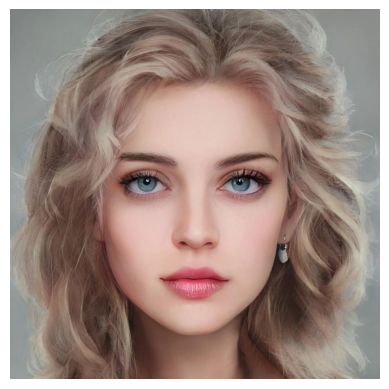

In [14]:
plt.imshow(init_image)
plt.axis('off')
plt.show()

  0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/37 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

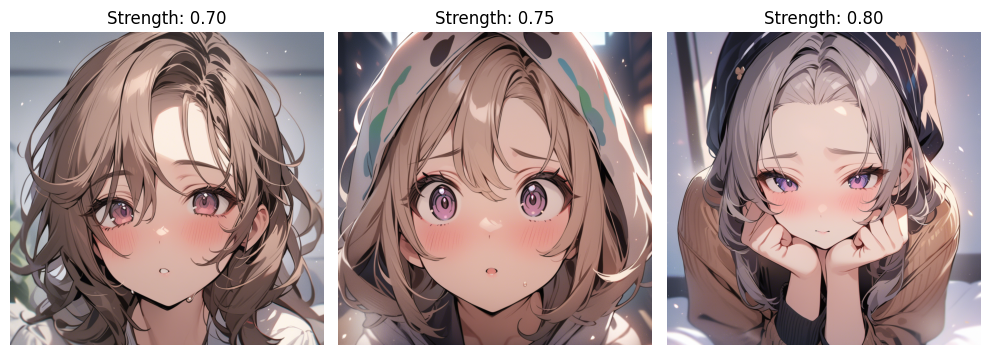

<Figure size 640x480 with 0 Axes>

In [17]:
prompt = 'best quality, cute, 1girl'
negative_prompt = 'nsfw, bad hands, text, error, missing fingers, extra digit, fewer digits, cropped, worst quality, low quality, normal quality'
# Set up the figure and axes
fig, axes = plt.subplots(1, 3, figsize=(10, 8))

# Define the list of strengths
list_strength = [0.7, 0.75, 0.8]

# Loop through each strength value
for idx, strength in enumerate(list_strength):
    # Generate the image using the pipeline
    result = pipe_2(
        prompt=prompt,
        negative_prompt=negative_prompt,
        image=init_image,
        strength=strength,
        guidance_scale=7.5
    )
    image = result.images[0]

    # Display the image in the subplot
    axes[idx].imshow(image)
    axes[idx].set_title(f"Strength: {strength:.2f}")
    axes[idx].axis('off')  # Optional: Remove axes for cleaner display

    # Save the individual image
    image.save(f'image_strength_{strength:.2f}.png')

# Show the plot
plt.tight_layout()
plt.show()


plt.tight_layout()
plt.show()

In [16]:
torch.cuda.empty_cache()